In [104]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
import pickle
SPLIT=5000

In [2]:
with open(r"processed_english.pkl", "rb") as input_file:
    data = pickle.load(input_file)

In [30]:
'''
Getting hinglish code-mixed stop words
'''
def get_hinglish_stopwords(fname):
    with open(fname) as fh:
        return set(fh.read().split())
    
hinglish_stopwords = get_hinglish_stopwords("hinglish_stopwords.txt")

In [31]:
hinglish_stopwords

{'boli',
 "c'mon",
 'pehli',
 'tabh',
 'towards',
 'bande',
 'sub',
 'wali',
 'get',
 'tum',
 'until',
 'waise',
 'thats',
 'various',
 'unho',
 'come',
 'issi',
 'cannot',
 'sensible',
 'inka',
 'vahi',
 'hoti',
 'baar',
 "he's",
 "where's",
 'of',
 'shan',
 'although',
 'no',
 'me',
 'why',
 'jiss',
 'theirs',
 'rha',
 "wasn't",
 'vale',
 'ever',
 'tu',
 'exactly',
 "haven't",
 'later',
 'regards',
 'gotten',
 'abhi',
 'rakhi',
 'jinhi',
 'often',
 'near',
 'di',
 'jin',
 'nevertheless',
 'jitni',
 'nhi',
 'mana',
 'itne',
 'dega',
 'sabse',
 'might',
 'little',
 'si',
 'tell',
 'neither',
 'inho',
 "what's",
 "you've",
 'andar',
 'kisliye',
 'followed',
 'kinn',
 'woh',
 'denge',
 'jahaan',
 'honi',
 'everyone',
 'isse',
 'all',
 'karta',
 'ones',
 'seem',
 'dekha',
 'unko',
 'but',
 'wale',
 'inner',
 'ho',
 'lagti',
 'tjhe',
 'know',
 'whether',
 'ghar',
 'itni',
 'seven',
 'hopefully',
 'chalega',
 'everywhere',
 'havent',
 'kept',
 'maana',
 'rakhen',
 'wala',
 'truly',
 'kinka'

In [49]:
data.shape

(6137, 3)

In [105]:
train = data[:SPLIT]
test = data[SPLIT:]

In [5]:
pd.options.display.max_colwidth = 400
train[train['sentiment'] == "negative"].head(10)
train[train['sentiment'] == "positive"].head(10)

,sentence_mixed,sentence_eng,sentiment
3,hmh8m7ptak all india me nrc lagu kare w kashmir se dhara 370ko khatam kare ham indian ko apse yahi umid hai,hmh8m7ptak all india me apply nurse w from kashmir dhara 370ko finish we indian hope this from you,positive
5,jeet kee dher sari subh kamnaye modi ji asha karta hu jistarah desh kee janta ne khas kar bihar kee jant … URL,many good wishes for victory modi ji hopes the people of the country especially bihar jant … URL,positive
13,rt tu safar mera tu hi meri manzil tere bina guzara aye dil hai mushkil 💘🙈 i love u ❤ URL,rt tu safar mera tu meri manzil tere bina gujara e dil hai difficult 💘🙈 i love you ❤ URL,positive
14,dobar se pm bnne kee aapko dher sari shubhakamnyen ummid hi aapke isa karykala me desh bhut si nyi uplbadhiyon k … URL,"dobar se pm hope you have a lot of good wishes to be made, during your tenure, the country will achieve many new achievements … URL",positive
15,we can face life together and we can spend my money on the both of us but it ’ s still my money waah kisi ne khub likha ke shama khud ko jala ke jaha ko roshan kardeta hai fir kiya tha apne aapne aap ko,"they can face life together and we can spend my money on the both of us but it ’ s still my money wow someone wrote a lot that shama burns herself and illuminates the world, and then did herself",positive
16,my money waah kisi ne khub likha ke shama khud ko jala ke jaha ko roshan kardeta hai fir kiya tha apne aapne aap ko ba … URL,"my money wow someone wrote a lot that shama burns herself and illuminates the world, and then did herself ba … URL",positive
18,star77 ohho very beautiful eyes yarrrrr evryone shit the fuck,star77 ohho very beautiful eyes yarrrrr everyone shut the fuck,positive
21,4akr4oobxv rt army fin also stade de france is preparing for the concert looks so beautiful 😍 see their post on instagram 👇🏼 URL,4akr4oobxv rt army fin also stade de france is preparing for the concert looks so beautiful 😍 see their post on instagram 👇🏼 URL,positive
22,jai shree ram jarurat nahi aandolan kee guruji modi hai to mumkinn hai pls trust our pm,jai shri ram does not need guruji modi of the movement hai to mumkinn hai pls trust our pm,positive
29,madam ji we always miss you as a mantri,madam we always miss you as a minister,positive


<AxesSubplot:>

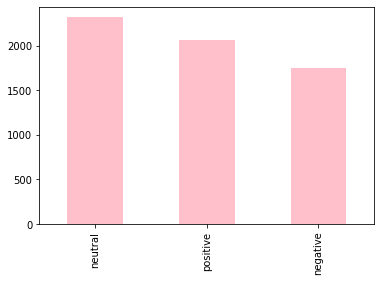

In [6]:
data['sentiment'].value_counts().plot.bar(color = 'pink', figsize = (6, 4))


In [32]:
train.groupby('sentiment').describe()


sentence_mixed         \
                   count unique   
sentiment                         
negative            1447   1444   
neutral             1887   1880   
positive            1666   1662   

                                                                                                                      \
                                                                                                                 top   
sentiment                                                                                                              
negative   bosidkie sharam karo kitna vote aayare tuje saale deposit be nahi mila sabse bade gaddara chutiye b … URL   
neutral                                                                                                        … URL   
positive            good morning pita ji thanks for the new day pls bless me sewa sumrin and parmarth bakso ji … URL   

               sentence_eng         \
          freq        count unique   
sentiment                            
negative     2         1447   1446   
neutral      4         1887   1880   
positive     2         1666   1662   

                                                                                                                \
                                                                                                           top   
sentiment                                                                                                        
negative                    sonu bjp ne more than 15 did not vote for anyone, you did not vote doge cong … URL   
neutral                                                                                                  … URL   
positive   good morning father thanks for the new day pls bless service in sumarin and paramarth buxo ji … URL   

                
          freq  
sentiment       
negative     2  
neutral      4  
positive     2

In [33]:
positivedata = data[data['sentiment'] == "positive"]
negativedata = data[data['sentiment'] == "negative"]
neutraldata = data[data['sentiment'] == "neutral"]

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:386: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['don', 'mon'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


Text(0.5, 1.0, 'Most Frequently Occuring Positive Words ')

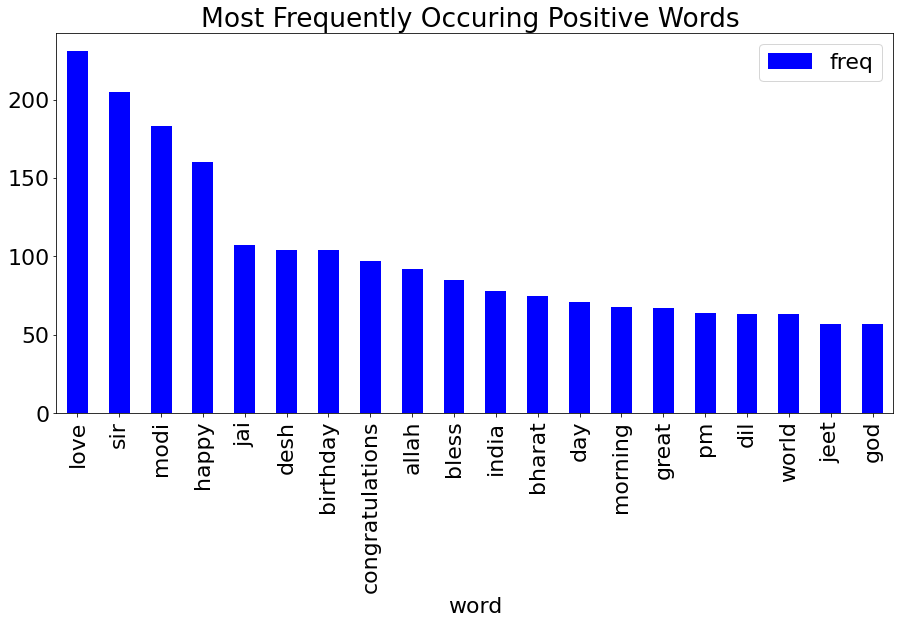

In [45]:
'''
Creating representations of most commonly occuring words
'''

from sklearn.feature_extraction.text import CountVectorizer


cv = CountVectorizer(stop_words=hinglish_stopwords)
words = cv.fit_transform(positivedata.sentence_mixed)

sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

frequency.head(20).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = 'blue')
plt.rcParams.update({'font.size': 22})
#plt.rcParams["figure.figsize"] = (20,10)
plt.title("Most Frequently Occuring Positive Words ")

Text(0.5, 1.0, 'WordCloud - Vocabulary from Reviews')

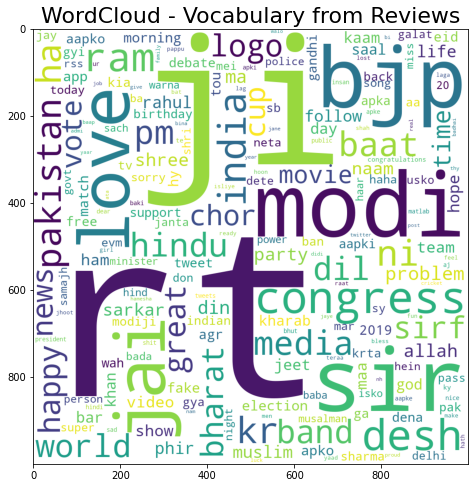

In [29]:
'''
Creating word clouds
'''

from wordcloud import WordCloud

wordcloud = WordCloud(background_color = 'white', width = 1000, height = 1000).generate_from_frequencies(dict(words_freq))

plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.title("WordCloud - Vocabulary from Reviews", fontsize = 22)

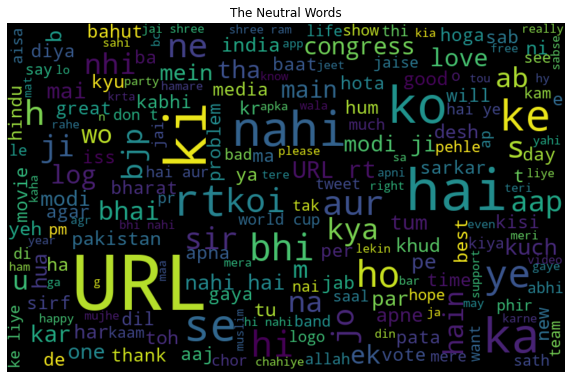

In [11]:
'''
Creating word clouds
'''
normal_words =' '.join([text for text in train['sentence_mixed'][train['sentiment'] == "neutral"]])

wordcloud = WordCloud(width=800, height=500, random_state = 0, max_font_size = 110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Neutral Words')
plt.show()

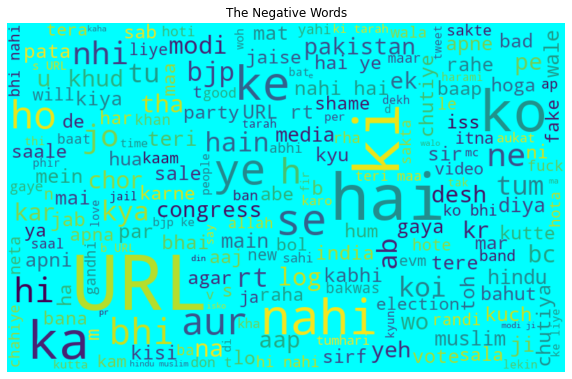

In [12]:
'''
Creating word clouds
'''

negative_words =' '.join([text for text in train['sentence_mixed'][train['sentiment'] == "negative"]])

wordcloud = WordCloud(background_color = 'cyan', width=800, height=500, random_state = 0, max_font_size = 110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Negative Words')
plt.show()

In [103]:
'''
Tokenizing the words present in the training set
'''
tokenized_tweet = train['sentence_eng'].apply(lambda x: x.split()) 

'''
traing word to vec model on random embeddings
'''
import gensim


model_w2v = gensim.models.Word2Vec(
            tokenized_tweet,
            size=200, # desired no. of features/independent variables 
            window=5, # context window size
            min_count=2,
            sg = 1, # 1 for skip-gram model
            hs = 0,
            negative = 10, # for negative sampling
            workers= 2, # no.of cores
            seed = 34)

model_w2v.train(tokenized_tweet, total_examples= len(train['sentence_eng']), epochs=20)

(1296397, 1869060)

In [14]:
from tqdm import tqdm
tqdm.pandas(desc="progress-bar")
from gensim.models.doc2vec import LabeledSentence

In [15]:
def add_label(twt):
    output = []
    for i, s in zip(twt.index, twt):
        output.append(LabeledSentence(s, ["tweet_" + str(i)]))
    return output

# label all the tweets
labeled_tweets = add_label(tokenized_tweet)

labeled_tweets[:6]

/home/ankita/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `LabeledSentence` (Class will be removed in 4.0.0, use TaggedDocument instead).
  after removing the cwd from sys.path.


[LabeledSentence(words=['nen', 'á', 'vist', 'bolest', 'vztek', 'smutek', 'zmatek', 'osam', 'ě', 'lost', 'beznad', 'ě', 'j', 'a', 'nakonec', 'jen', 'klid', 'asi', 'takhle', 'vypad', 'á', 'm', 'ů', 'j', 'life'], tags=['tweet_0']),
 LabeledSentence(words=['yes', 'friend', '😔😔', 'when', 'will', 'he', 'post', '😭', 'he', 'didn', 't', 'really', 'photoshoot', 'then', 'he', 'will', 'post', '…', 'URL'], tags=['tweet_1']),
 LabeledSentence(words=['5rslsbzntt', 'television', 'media', 'congress', 'not', 'for', 'you', 'must', 'have', 'known', 'this', 'good', 'that', 'congress', 'ke', '…', 'URL'], tags=['tweet_2']),
 LabeledSentence(words=['hmh8m7ptak', 'all', 'india', 'me', 'apply', 'nurse', 'w', 'from', 'kashmir', 'dhara', '370ko', 'finish', 'we', 'indian', 'hope', 'this', 'from', 'you'], tags=['tweet_3']),
 LabeledSentence(words=['who', 'is', 'crazy', '?', 'they', 'aren', '’', 't', 'real', 'issues', 'mandir', 'is', 'important', 'hindu', 'who', 'is', 'in', 'danger'], tags=['tweet_4']),
 LabeledSent

In [16]:
# removing unwanted patterns from the data

import re
import nltk

nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to /home/ankita/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [17]:
train_corpus = []

for i in range(0, 5000):
  review = re.sub('[^a-zA-Z]', ' ', train['sentence_eng'][i])
  review = review.lower()
  review = review.split()
  
  ps = PorterStemmer()
  
  # stemming
  review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
  
  # joining them back with space
  review = ' '.join(review)
  train_corpus.append(review)

In [18]:
test_corpus = []

for i in range(5000, 6137):
  review = re.sub('[^a-zA-Z]', ' ', test['sentence_eng'][i])
  review = review.lower()
  review = review.split()
  
  ps = PorterStemmer()
  
  # stemming
  review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
  
  # joining them back with space
  review = ' '.join(review)
  test_corpus.append(review)

In [34]:
train =train.replace("positive",1)
train =train.replace("negative",2)
train = train.replace("neutral",0)

In [41]:

# creating bag of words

from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features = 2500)
x = cv.fit_transform(train_corpus).toarray()
y = train.iloc[:, -1]

print(x.shape)
print(y.shape)

(5000, 2500)
(5000,)


In [42]:
y

0       0
1       0
2       2
3       1
4       0
       ..
4995    0
4996    0
4997    0
4998    0
4999    1
Name: sentiment, Length: 5000, dtype: int64

In [43]:
# creating bag of words

from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features = 2500)
x_test = cv.fit_transform(test_corpus).toarray()

print(x_test.shape)

(1137, 2500)


In [44]:
# splitting the training data into train and valid sets

from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size = 0.25, random_state = 42)

print(x_train.shape)
print(x_valid.shape)
print(y_train.shape)
print(y_valid.shape)

(3750, 2500)
(1250, 2500)
(3750,)
(1250,)


In [46]:

# standardization

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_valid = sc.transform(x_valid)
x_test = sc.transform(x_test)

In [49]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

model = RandomForestClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_valid)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_valid, y_valid))

# calculating the f1 score for the validation set
print("F1 score :", f1_score(y_valid, y_pred,average='macro'))

# confusion matrix
cm = confusion_matrix(y_valid, y_pred)
print(cm)

Training Accuracy : 0.9965333333333334
Validation Accuracy : 0.5384
F1 score : 0.5412254244381617
[[244 132 118]
 [110 232  39]
 [126  52 197]]


In [51]:

from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_valid)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_valid, y_valid))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(y_valid, y_pred,average='macro'))

# confusion matrix
cm = confusion_matrix(y_valid, y_pred)
print(cm)

Training Accuracy : 0.9618666666666666
Validation Accuracy : 0.4488
f1 score : 0.44758300741576096
[[227 143 124]
 [135 174  72]
 [131  84 160]]


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [52]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_valid)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_valid, y_valid))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(y_valid, y_pred,average='macro'))

# confusion matrix
cm = confusion_matrix(y_valid, y_pred)
print(cm)

Training Accuracy : 0.9965333333333334
Validation Accuracy : 0.488
f1 score : 0.4901567524416326
[[219 122 153]
 [114 202  65]
 [123  63 189]]


In [53]:
from sklearn.svm import SVC

model = SVC()
model.fit(x_train, y_train)

y_pred = model.predict(x_valid)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_valid, y_valid))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(y_valid, y_pred,average='macro'))

# confusion matrix
cm = confusion_matrix(y_valid, y_pred)
print(cm)

Training Accuracy : 0.6794666666666667
Validation Accuracy : 0.4736
f1 score : 0.445537672564497
[[351  92  51]
 [220 138  23]
 [224  48 103]]


In [56]:

from xgboost import XGBClassifier

model = XGBClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_valid)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_valid, y_valid))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(y_valid, y_pred,average='macro'))

# confusion matrix
cm = confusion_matrix(y_valid, y_pred)
print(cm)

Training Accuracy : 0.7792
Validation Accuracy : 0.5552
f1 score : 0.5551187071260827
[[298 106  90]
 [128 220  33]
 [165  34 176]]


**ERROR ANALYSIS**

In [47]:
with open("BERTOP.pkl", "rb") as input_file:
    bert_output = pickle.load(input_file)

In [101]:
data['index']=data["sentence_eng"].str.find("championship") 

In [102]:
data[data['index']!=-1]

,sentence_mixed,sentence_eng,sentiment,index
2045,rt moeshaaa a week ago we didn ’ t win the championship but we came in 5th overall and got all american ohhhh and don ’ t forget we made …,rt moeshaaa ा week ago we didn ’ t win the championship but we came in 5th overall and got all american ohhhh and don ’ t forget we made …,neutral,43
5626,think afghanistan can reach the semi finals keep it up ajinkya need your such form for test championship 👍,think afghanistan can reach the semi finals keep it deputy ajinkya need your such form for test championship 👍,positive,96


0= negative ,1 = neutral 2= positive

In [92]:
false_bert=bert_output[bert_output['sent_actual']!=bert_output['sent_pred']]

In [67]:
data

,sentence_mixed,sentence_eng,sentiment,index
0,nen á vist bolest vztek smutek zmatek osam ě lost beznad ě j a nakonec jen klid asi takhle vypad á m ů j life,nen á vist bolest vztek smutek zmatek osam ě lost beznad ě j a nakonec jen klid asi takhle vypad á m ů j life,neutral,-1
1,haan yaar neha 😔😔 kab karega woh post 😭 usne na sach mein photoshoot karna chahiye phir woh post karega … URL,yes friend 😔😔 when will he post 😭 he did not really photoshoot then he will post … URL,neutral,-1
2,5rslsbzntt television media congress ke liye nhi hai ye toh aapko pata chal hi gya hoga achha hoga kee congress ke … URL,5rslsbzntt television media congress not for you must have known this good that congress ke … URL,negative,-1
3,hmh8m7ptak all india me nrc lagu kare w kashmir se dhara 370ko khatam kare ham indian ko apse yahi umid hai,hmh8m7ptak all india me apply nurse w from kashmir dhara 370ko finish we indian hope this from you,positive,-1
4,who pagal hai kya ? they aren ’ t real issues mandir is important hindu khatre mei jo hai,who is crazy ? they aren ’ t real issues mandir is important hindu who is in danger,neutral,-1
...,...,...,...,...
6132,n9mja65znk saale gaandu khud porn dikhta hai aur dusre ko blame karta hai 😂,n9mja65znk saale lady herself porn looks at the other blame does 😂,negative,-1
6133,so i could not get no one to cover me for my birthday but im going to open that day so i mean i guess it is okkk,s o i could not get no one to cover me for my birthday but im going to open that day so i mean i guess it is jock,positive,-1
6134,rt aap logo kee baat nahi kar raha najim bhai media walo kee kar raha hu jo bina janche parkhe one sided news …,"rt aap nazim bhai is not talking about the people of the media, who is testing without checking one sided news …",positive,-1
6135,… jay jay shree ram ram rajye aaya he danavo rakshasho chudelno or surpankha ke gharoke sa … URL,"… jay jai shri ram, the kingdom of rama has come with the house of demons, demons and churnelo … URL",positive,-1


In [71]:
pd.set_option("display.max_colwidth", -1)
kk =false_bert.merge(data, how='left',left_on='text',right_on='sentence_eng')

/home/ankita/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """Entry point for launching an IPython kernel.


In [97]:
false_bert[(false_bert['sent_actual']-false_bert['sent_pred']==2)|(false_bert['sent_actual']-false_bert['sent_pred']==-2)].shape

(41, 3)

In [100]:
false_bert.shape

(281, 3)